# Exploratory Data Analysis Diamond Prices

## Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## Data Loading
Memuat dataset harga berlian dari `https://raw.githubusercontent.com/miftahfadil/Predictive-Analytics-Diamond-Prices/refs/heads/main/datasets/diamonds_dataset.csv`

In [3]:
# dataset_url = "https://raw.githubusercontent.com/miftahfadil/Predictive-Analytics-Diamond-Prices/refs/heads/main/datasets/diamonds_dataset.csv"
dataset_path = "datasets/diamonds_dataset.csv"
diamonds_dataset = pd.read_csv(dataset_path)
diamonds_dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74



Bagaimana distribusi variabel dalam dataset?
Apakah ada missing value?
Apakah ada fitur yang tidak berguna (redundant)?
Bagaimana korelasi antara fitur dan target?

**Apa saja jenis variabel pada dataset?**

1. Harga dalam dolar Amerika Serikat ($) adalah fitur target. 
2. carat: merepresentasikan bobot (weight) dari diamonds (0.2-5.01), digunakan sebagai ukuran dari batu permata dan perhiasan.
3. cut: merepresentasikan kualitas pemotongan diamonds (Fair, Good, Very Good, Premium, and Ideal).
4. color: merepresentasikan warna, dari J (paling buruk) ke D (yang terbaik).
5. clarity: merepresentasikan seberapa jernih diamonds (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))
6. x: merepresentasikan panjang diamonds dalam mm (0-10.74).
7. y: merepresentasikan lebar diamonds dalam mm (0-58.9).
8. z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).
9. depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) (43-79).
10. table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar (43-95).

In [4]:
# Mengecek informasi kolom dalam diamonds_dataset
diamonds_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


- Terdapat 3 kolom dengan tipe object, yaitu: cut, color, dan clarity. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 6 kolom numerik dengan tipe data float64 yaitu: carat, depth, table, x, y, dan z. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
- Terdapat 1 kolom numerik dengan tipe data int64, yaitu: price. Kolom ini merupakan target fitur kita.

In [5]:
# Mengecek statistik deskriptif diamonds_dataset
diamonds_dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Nilai minimum dari kolom x, y, dan z adalah 0.0, padahal sebuah berlian tidak mungkin salah satu atau beberapa dimensinya bernilai 0. Diduga terdapat data yang tidak valid karena missing value.

__Handling Missing Value__

In [6]:
# Mengecek jumlah missing value pada kolom x, y, dan z
missing_x = (diamonds_dataset.x == 0).sum()
missing_y = (diamonds_dataset.y == 0).sum()
missing_z = (diamonds_dataset.z == 0).sum()
print(f"Nilai 0 di kolom x ada: {missing_x}")
print(f"Nilai 0 di kolom y ada: {missing_y}")
print(f"Nilai 0 di kolom z ada: {missing_z}")

Nilai 0 di kolom x ada: 8
Nilai 0 di kolom y ada: 7
Nilai 0 di kolom z ada: 20


In [7]:
# Drop baris pada kolom x, y, dan z yang bernilai 0
diamonds_dataset = diamonds_dataset.loc[(diamonds_dataset[['x', 'y', 'z']]!=0).all(axis=1)]

diamonds_dataset.shape

(53920, 10)

In [8]:
diamonds_dataset.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


__Handling Outliers__


Hypotesis testing, Z-score method, `IQR method`

<Axes: xlabel='price'>

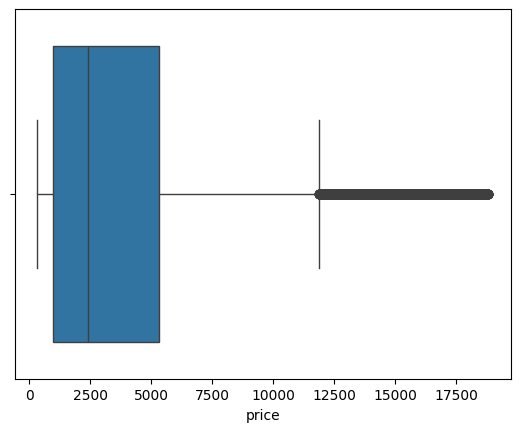

In [9]:
sns.boxplot(x=diamonds_dataset['price'])

<Axes: xlabel='carat'>

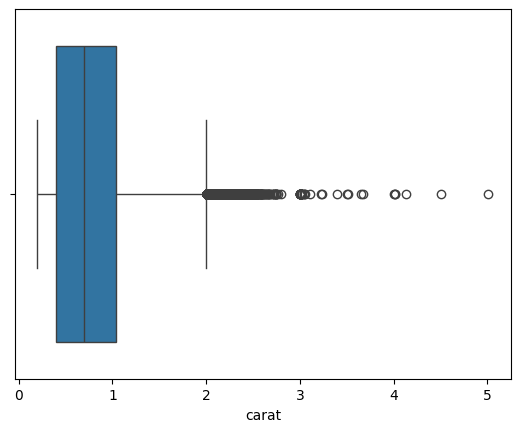

In [10]:
sns.boxplot(x=diamonds_dataset['carat'])

<Axes: xlabel='depth'>

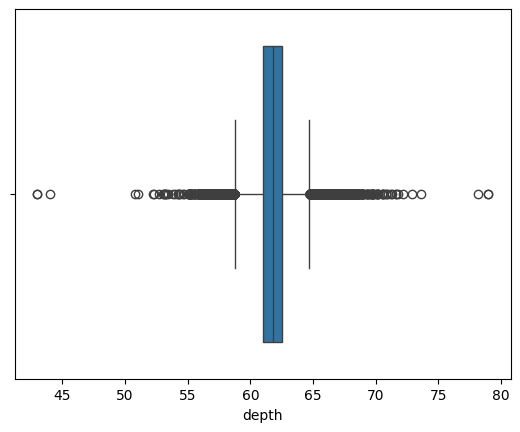

In [11]:
sns.boxplot(x=diamonds_dataset['depth'])

<Axes: xlabel='table'>

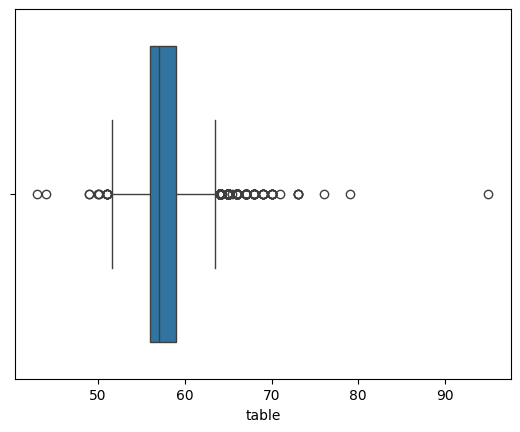

In [12]:
sns.boxplot(x=diamonds_dataset['table'])

<Axes: xlabel='x'>

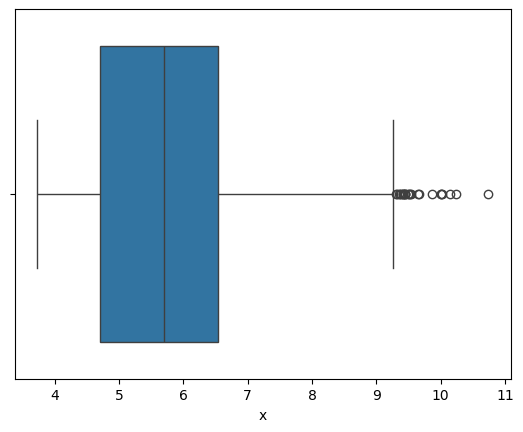

In [13]:
sns.boxplot(x=diamonds_dataset['x'])

<Axes: xlabel='y'>

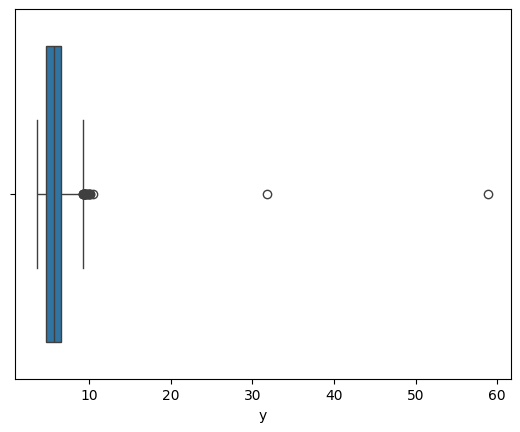

In [14]:
sns.boxplot(x=diamonds_dataset['y'])

<Axes: xlabel='z'>

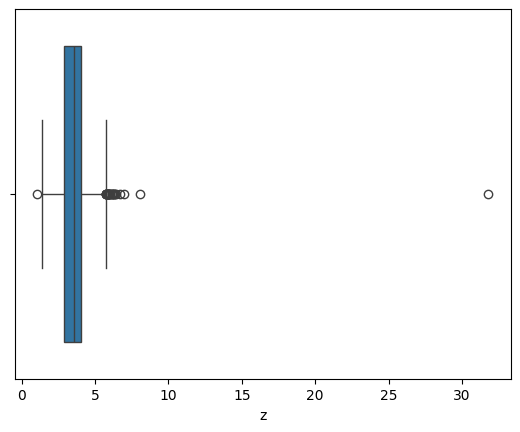

In [15]:
sns.boxplot(x=diamonds_dataset['z'])

Digunakan Inter Quartile Range (IQR) method

`Batas bawah = Q1 - 1.5*IQR`

`Batas atas = Q3 + 1.5*IQR`

In [16]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

In [17]:
# Drop setiap row outlier dalam numerical_features 
for num_feat in numerical_features:
    Q1 = diamonds_dataset[num_feat].quantile(q=0.25)
    Q3 = diamonds_dataset[num_feat].quantile(q=0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5*IQR
    batas_atas = Q3 + 1.5*IQR
    diamonds_dataset=diamonds_dataset[(diamonds_dataset[num_feat] >= batas_bawah) & (diamonds_dataset[num_feat] <= batas_atas)]

diamonds_dataset.shape

(47091, 10)

__Univariate Analysis__

_Categorical Features_

           jumlah sampel  persentase
cut                                 
Ideal              20319        43.1
Premium            11944        25.4
Very Good          10864        23.1
Good                3696         7.8
Fair                 268         0.6


<Axes: title={'center': 'cut'}, xlabel='cut'>

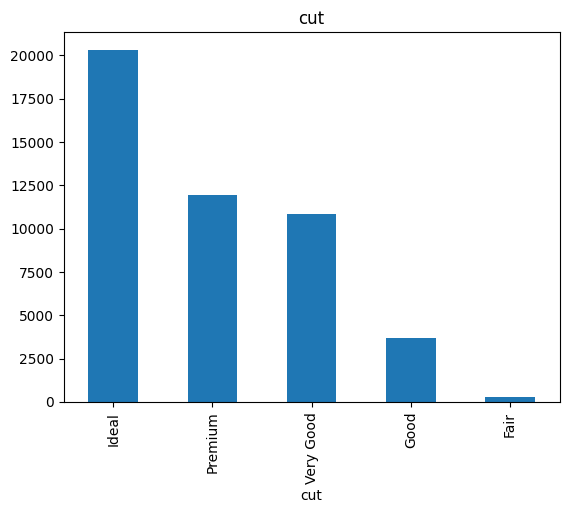

In [18]:
# Feature Cut
feature = categorical_features[0]
count = diamonds_dataset[feature].value_counts()
percent = 100*diamonds_dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari data persentase dapat kita simpulkan bahwa lebih dari __60%__ sampel merupakan diamonds tipe __grade tinggi__, yaitu grade __Ideal__ dan __Premium__.

       jumlah sampel  persentase
color                           
G               9992        21.2
E               8830        18.8
F               8396        17.8
H               7114        15.1
D               6123        13.0
I               4431         9.4
J               2205         4.7


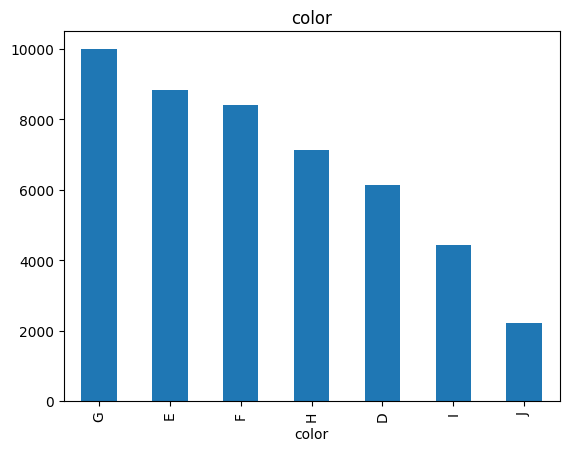

In [19]:
# Feature Color
feature = categorical_features[1]
count = diamonds_dataset[feature].value_counts()
percent = 100*diamonds_dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Urutan kategori warna -> (terbaik) D, E, F, G, H, I, J (terburuk)

Dari grafik di atas, dapat kita simpulkan bahwa sebagian besar grade berada pada grade menengah, yaitu G, F, H.

         jumlah sampel  persentase
clarity                           
SI1              11433        24.3
VS2              10850        23.0
VS1               7337        15.6
SI2               7265        15.4
VVS2              4658         9.9
VVS1              3445         7.3
IF                1644         3.5
I1                 459         1.0


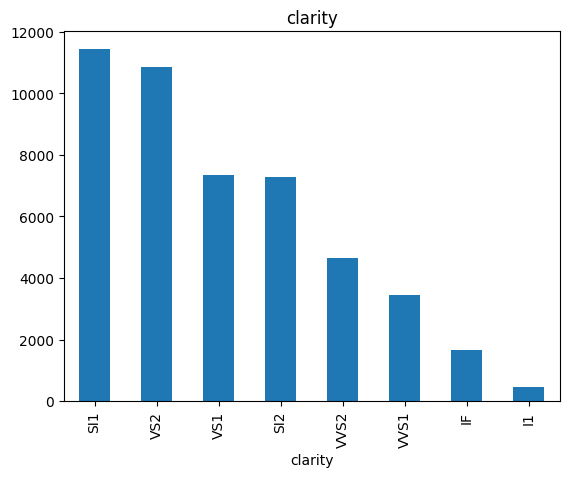

In [20]:
# Feature Clarity
feature = categorical_features[2]
count = diamonds_dataset[feature].value_counts()
percent = 100*diamonds_dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan informasi dari deskripsi variabel, fitur Clarity terdiri dari 8 kategori dari yang paling buruk ke yang paling baik, yaitu: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF.

1. 'IF' - Internally Flawless 
2. 'VVS2' - Very Very Slight Inclusions 
3. 'VVS1' - Very Very Slight Inclusions 
4. 'VS1' - Very Slight Inclusions
5. 'VS2' - Very Slight Inclusions
6. 'SI2' - Slight Inclusions
7. 'SI1' - Slight Inclusions
8. 'I1' - Imperfect

Dari grafik kita bisa menyimpulkan bahwa sebagian besar fitur merupakan grade rendah, yaitu SI1, SI2, dan VS2.

_Numerical Features_

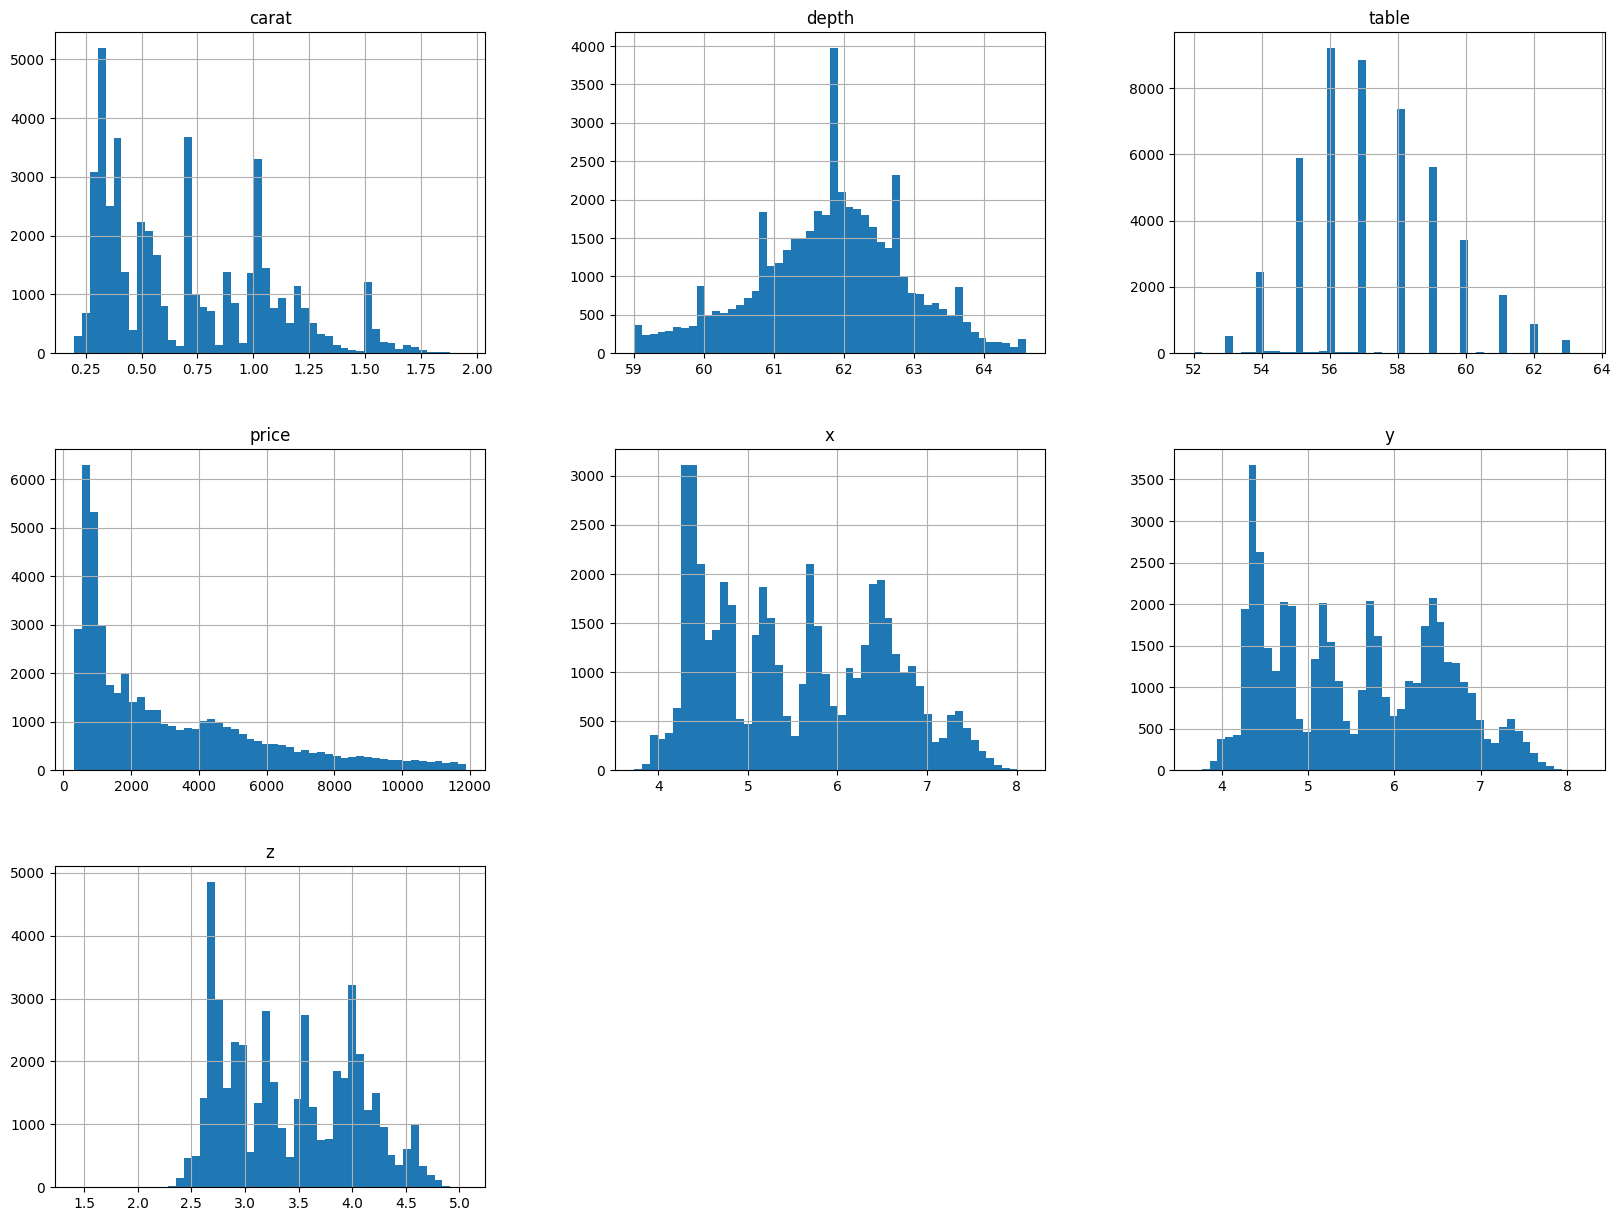

In [21]:
# Plot masing-masing histogram dari numerical features 
diamonds_dataset.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram "price", kita bisa memperoleh beberapa informasi, antara lain:

- Peningkatan harga diamonds sebanding dengan penurunan jumlah sampel. Hal ini dapat kita lihat jelas dari histogram "price" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu y).
- Rentang harga diamonds cukup tinggi yaitu dari skala ratusan dolar Amerika hingga sekitar $11800.
- Setengah harga berlian bernilai di bawah $2500.
- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

__Multivariate Analysis__

_Categorical Features_

C:\Users\mifta\AppData\Local\Temp\ipykernel_12604\68460587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds_dataset, palette="Set3")
C:\Users\mifta\AppData\Local\Temp\ipykernel_12604\68460587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds_dataset, palette="Set3")
C:\Users\mifta\AppData\Local\Temp\ipykernel_12604\68460587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

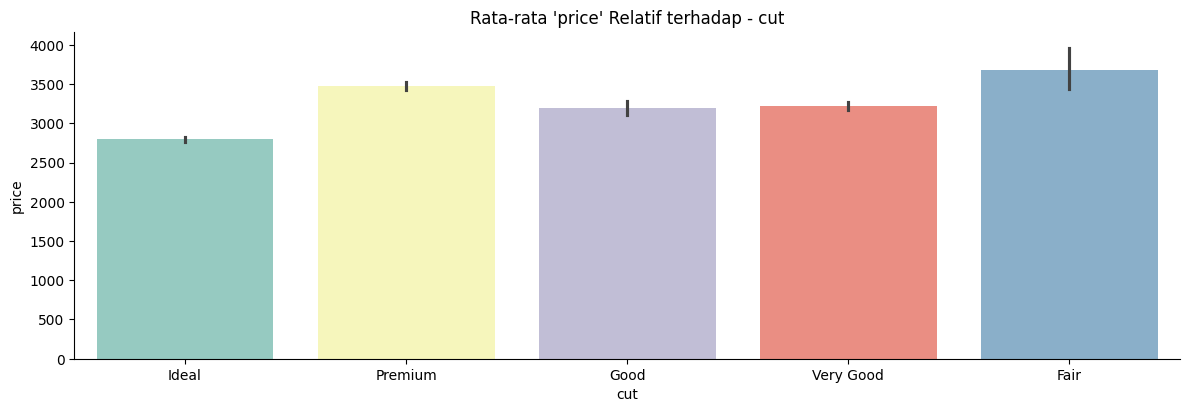

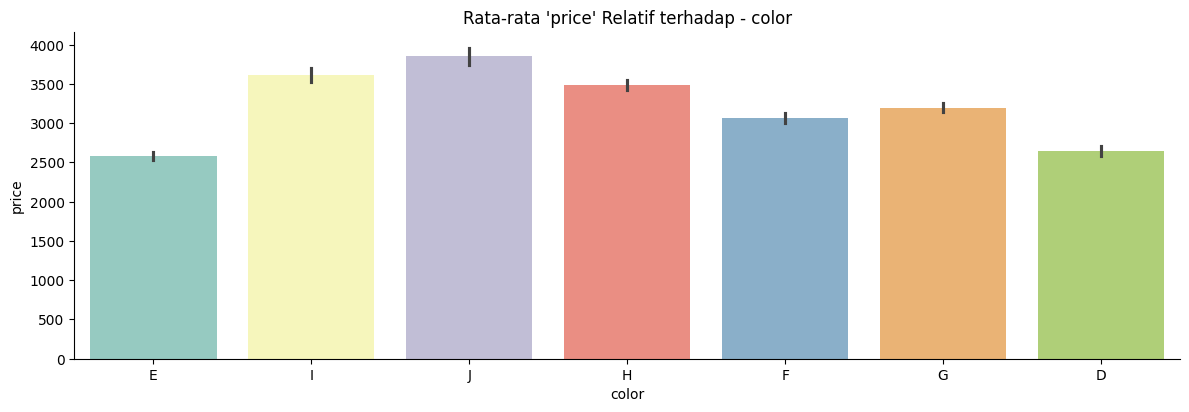

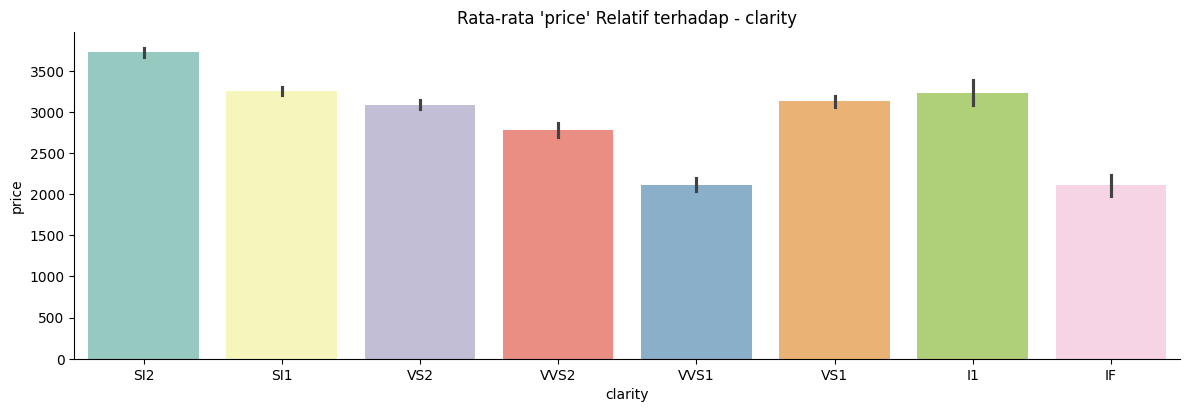

In [23]:
# Mengecek rata-rata harga terhadap setiap fitur category
for feature in categorical_features:
  sns.catplot(x=feature, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds_dataset, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(feature))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:

- Pada fitur ‘cut’, rata-rata harga cenderung mirip. Rentangnya berada antara 3500 hingga 4500. Grade tertinggi yaitu grade Ideal memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.
- Pada fitur ‘color’, semakin rendah grade warna, harga diamonds justru semakin tinggi. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.
- Pada fitur ‘clarity’, secara umum, diamond dengan grade lebih rendah memiliki harga yang lebih tinggi. Hal ini berarti bahwa fitur ‘clarity’ memiliki pengaruh yang rendah terhadap harga.
- Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap harga.


_Numerical Features_

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi `pairplot()`. Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi `corr()`. Tidak perlu menunggu lama, mari kita langsung analisis datanya.

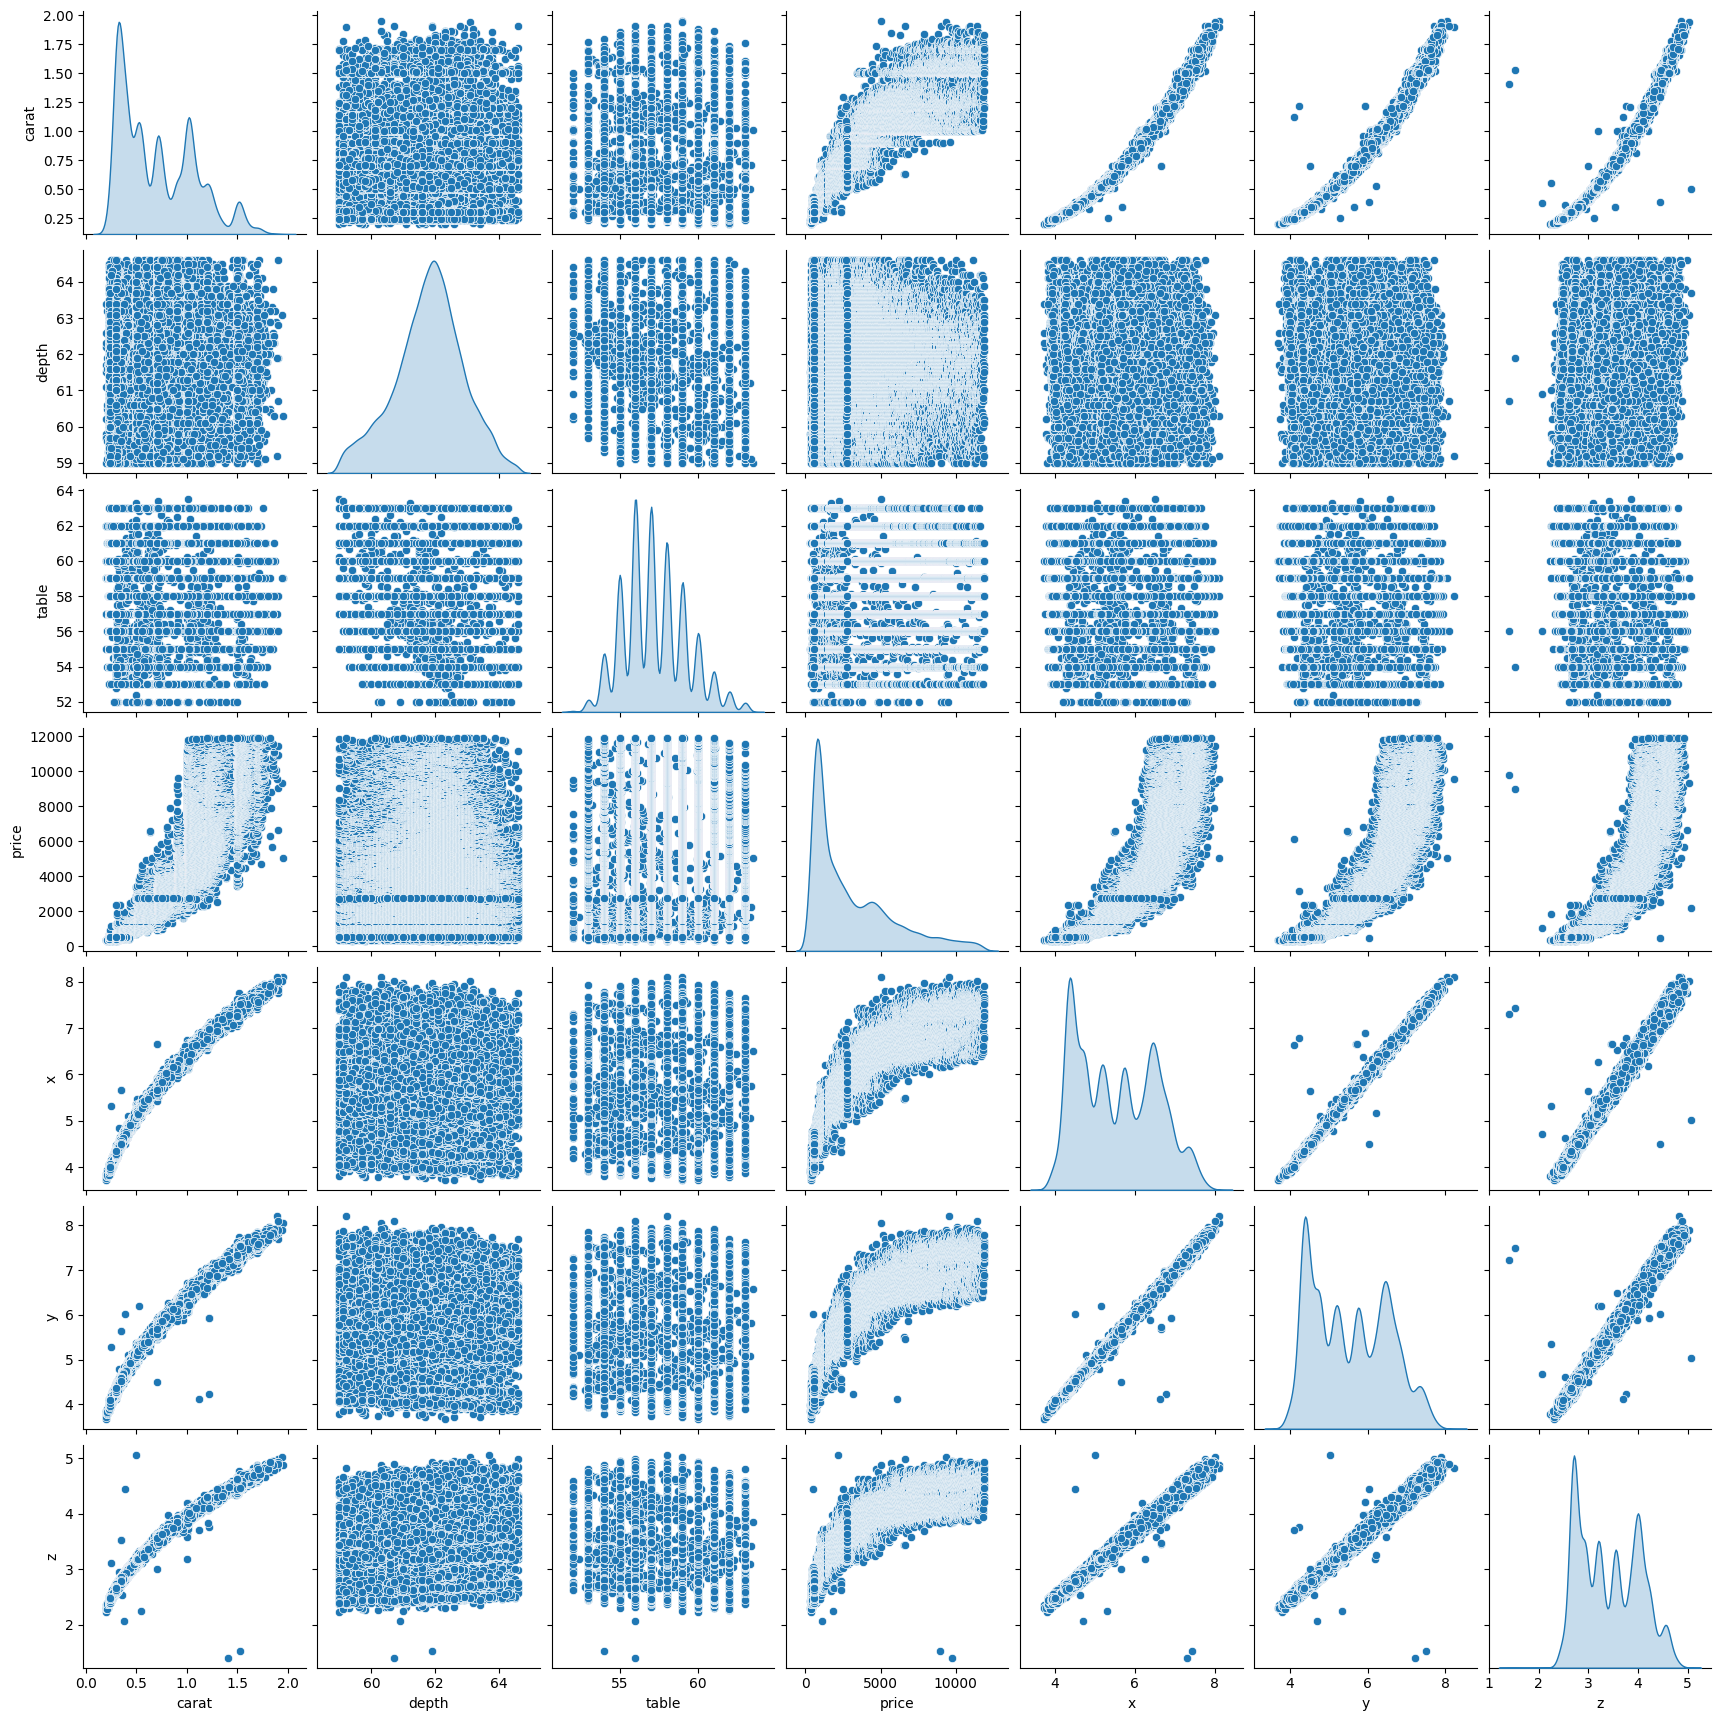

In [25]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(diamonds_dataset, diag_kind = 'kde')

Pada pola sebaran data grafik pairplot sebelumnya, terlihat ‘carat’, ‘x’, ‘y’, dan ‘z’ memiliki korelasi yang tinggi dengan fitur "price". Sedangkan kedua fitur lainnya yaitu 'depth' dan 'table' terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola. Untuk mengevaluasi skor korelasinya, gunakan fungsi `corr()`.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

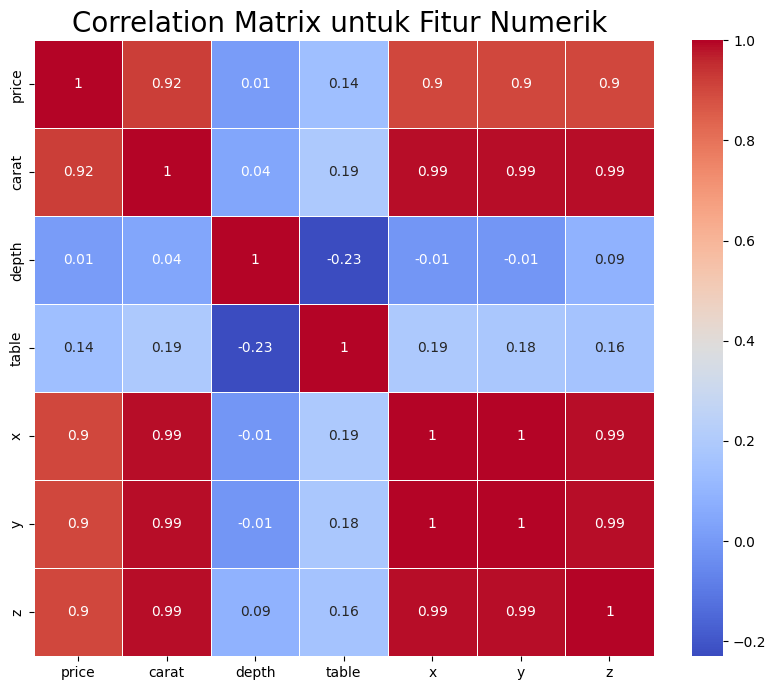

In [27]:
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds_dataset[numerical_features].corr().round(2)

# Untuk menampilkan nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Jika kita amati, fitur `'carat'`, `'x'`, `'y'`, dan `'z'` memiliki skor korelasi tinggi (di atas 0.9) dengan fitur target `'price'`. Artinya, fitur `'price'`berkorelasi tinggi dengan keempat fitur tersebut. Sementara itu, fitur `'depth'` memiliki korelasi yang sangat kecil (0.01). Sehingga, fitur tersebut dapat di-drop.

In [28]:
# Drop kolom depth
diamonds_dataset.drop(['depth'], inplace=True, axis=1)
diamonds_dataset.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


Export data hasil EDA

In [29]:
# diamonds_dataset.to_csv("datasets/diamonds_dataset_after_EDA.csv")